# Guide on how to use the plot_utils module for post-processing analysis

This notebook primarily deals with the classifier since the post-processing analysis of the VAE is yet to be completely defined.

Consider the following command in run using one the sample config files :

```python3 watchmal.py -l test_kazunet```

The program dumps the following in the dump_path(default = dumps)/run_id/ directory :

    1. config_file.ini # Copy of the configuration file used for the run
    2. log_train.csv   # .csv file with the training log data ( epoch, iterations, loss, accuracy )
    3. val_test.csv    # .csv file with the validation log data ( iteration, val loss, val accuracy )
    4. energies.npy    # 1-D .npy array with the true energies of the validation events 
    5. labels.npy      # 1-D .npy array with the true labels of the validation events 
    6. predictions.npy # 1-D .npy array with the generated predictions on the validation events
    7. softmax.npy     # 2-D .npy array with the softmax predicitons for each class
    
The run_id is defined by the time at which the program is run and is the unique identifier for each of the runs.


In [1]:
# Useful general imports

import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import h5py

# Add the path to the parent directory to augment search for module
par_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if par_dir not in sys.path:
    sys.path.append(par_dir)
    
# Import the custom plotting module
from plot_utils import plot_utils

## Setup the path to the dump directory and load the files

In [2]:
# Using the absolute path
run_id = "20190617_152841"
dump_dir = "/home/akajal/WatChMaL/VAE/dumps/" + run_id + "/"

# Load the numpy arrays into memory
softmaxes = np.load(dump_dir + "softmax.npy")
labels = np.load(dump_dir + "labels.npy")
predictions = np.load(dump_dir + "predictions.npy")
energies = np.load(dump_dir + "energies.npy")

# Check the shapes of the loaded arrays
print("softmaxes shape : ", softmaxes.shape)
print("labels shape : ", labels.shape)
print("predictions shape : ", predictions.shape)
print("energies shape : ", energies.shape)

softmaxes shape :  (5000, 3)
labels shape :  (5000,)
predictions shape :  (5000,)
energies shape :  (5000,)


## Plot the true energy distribution of the events

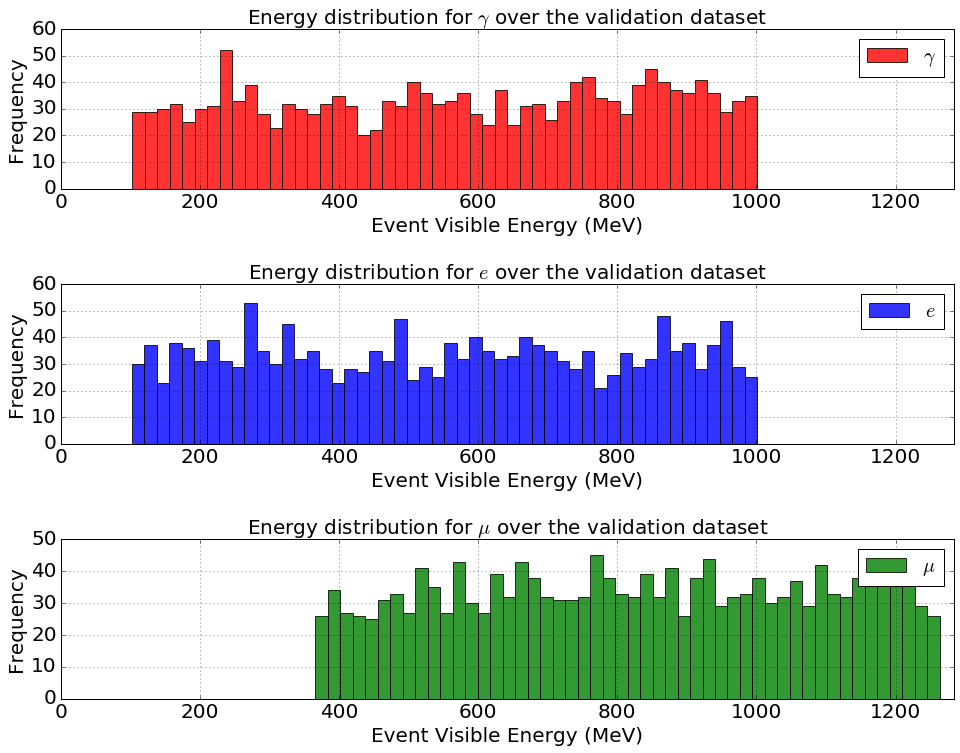

In [3]:
# Plot the energy distribution
plot_utils.plot_event_energy_distribution(energies, labels, {"gamma":0, "e":1, "mu":2},
                                          dset_type="validation", show_plot=True)

## Apply chernkov correction to the energies and plot again

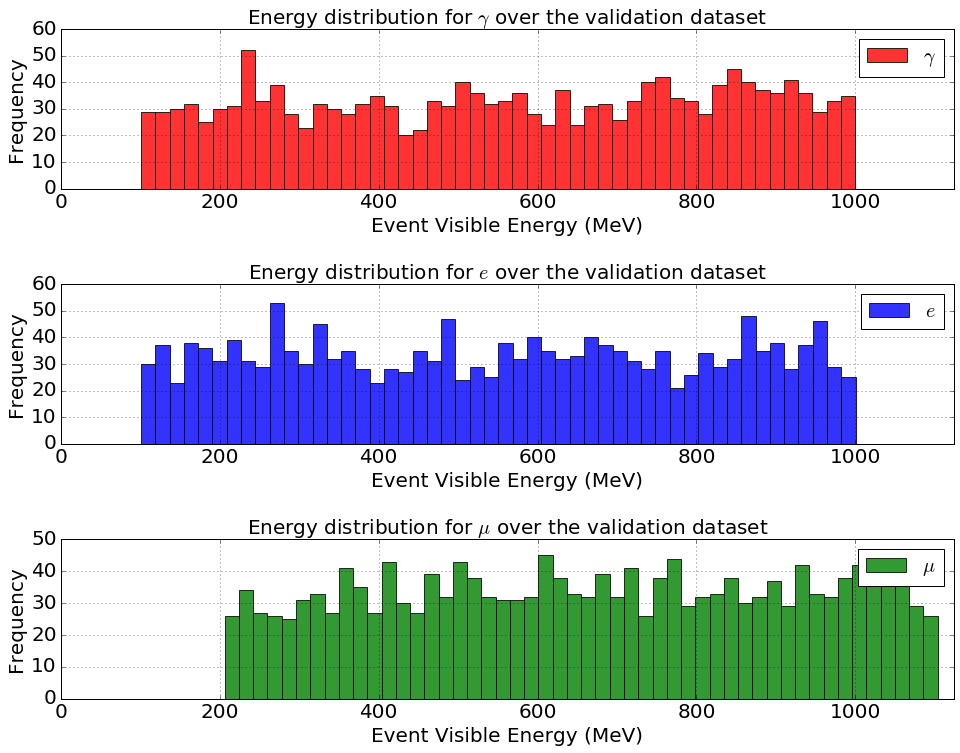

In [4]:
# Convert the energies
energies = plot_utils.convert_to_visible_energy(energies, labels)
plot_utils.plot_event_energy_distribution(energies, labels, {"gamma":0, "e":1, "mu":2},
                                          dset_type="validation", show_plot=True)

## Plot the confusion matrix

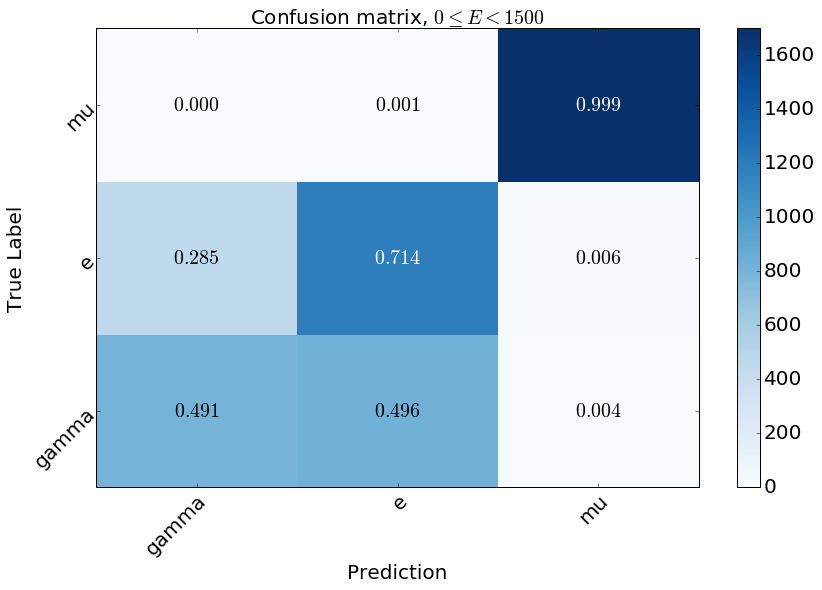

In [5]:
# Plot the confusion matrix
plot_utils.plot_confusion_matrix(labels, predictions, energies, ["gamma", "e", "mu"], show_plot=True)

## Plot the classifier response curve

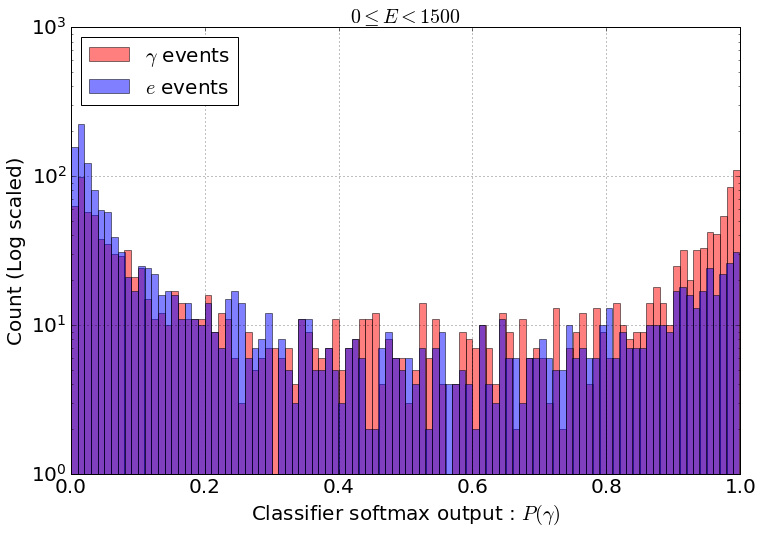

(array([157., 224., 123.,  80.,  59.,  57.,  39.,  31.,  21.,  17.,  25.,
         24.,  22.,  16.,  17.,  16.,  11.,  14.,  11.,  10.,  14.,   9.,
          7.,  15.,  17.,  14.,   6.,   7.,   8.,  12.,   1.,   8.,   5.,
          3.,  11.,  11.,   5.,   5.,   7.,   5.,   3.,   7.,   8.,   6.,
          2.,   2.,   7.,   9.,   6.,   5.,   6.,   4.,   7.,   2.,   7.,
          9.,   4.,   4.,   5.,   4.,   2.,  10.,   4.,   3.,  11.,   6.,
          6.,   3.,   6.,   6.,   8.,   6.,   5.,   5.,  10.,   6.,   7.,
          6.,   6.,  10.,  13.,   6.,   9.,   7.,   7.,   7.,  10.,  10.,
         10.,   9.,  17.,  18.,  16.,  13.,  17.,  24.,  16.,  22.,  26.,
         31.]),
 array([5.1262026e-04, 1.0493805e-02, 2.0474989e-02, 3.0456174e-02,
        4.0437359e-02, 5.0418541e-02, 6.0399726e-02, 7.0380911e-02,
        8.0362096e-02, 9.0343282e-02, 1.0032447e-01, 1.1030565e-01,
        1.2028683e-01, 1.3026802e-01, 1.4024921e-01, 1.5023039e-01,
        1.6021158e-01, 1.7019275e-01, 1.801739

In [6]:
# Plot the classifier response curve
plot_utils.plot_classifier_response(softmaxes, labels, energies, softmax_index_dict={"gamma":0, "e":1},
                                    event_dict={"gamma":0}, show_plot=True)

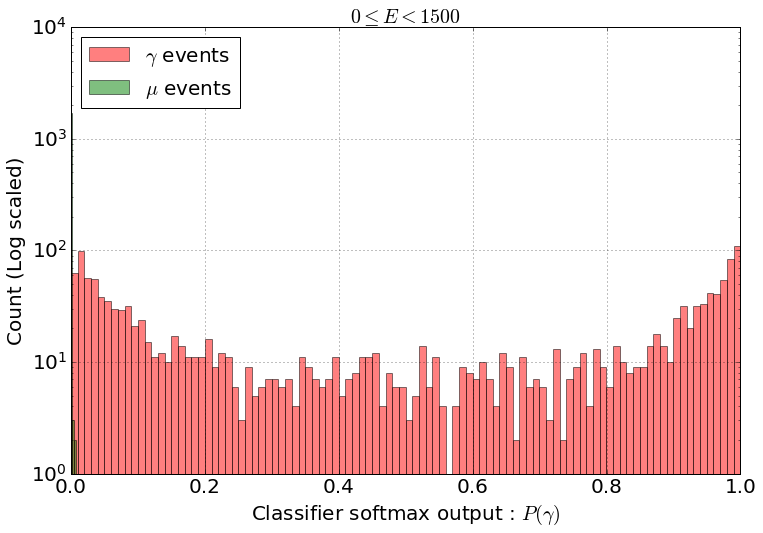

(array([1.691e+03, 3.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

In [7]:
# Plot the classifier response curve
plot_utils.plot_classifier_response(softmaxes, labels, energies, softmax_index_dict={"gamma":0, "mu":2},
                                    event_dict={"gamma":0}, show_plot=True)

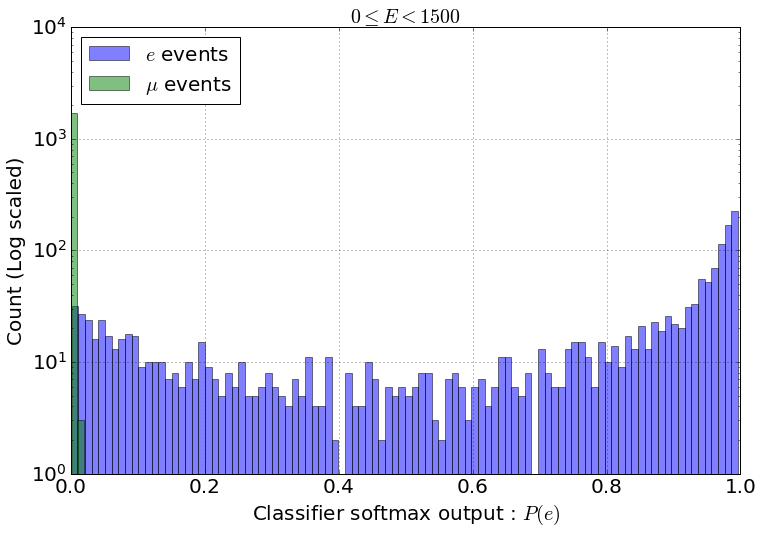

(array([1.69e+03, 3.00e+00, 1.00e+00, 0.00e+00, 1.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 

In [8]:
# Plot the classifier response curve
plot_utils.plot_classifier_response(softmaxes, labels, energies, softmax_index_dict={"e":1, "mu":2},
                                    event_dict={"e":1}, show_plot=True)

## Plot the ROC curve

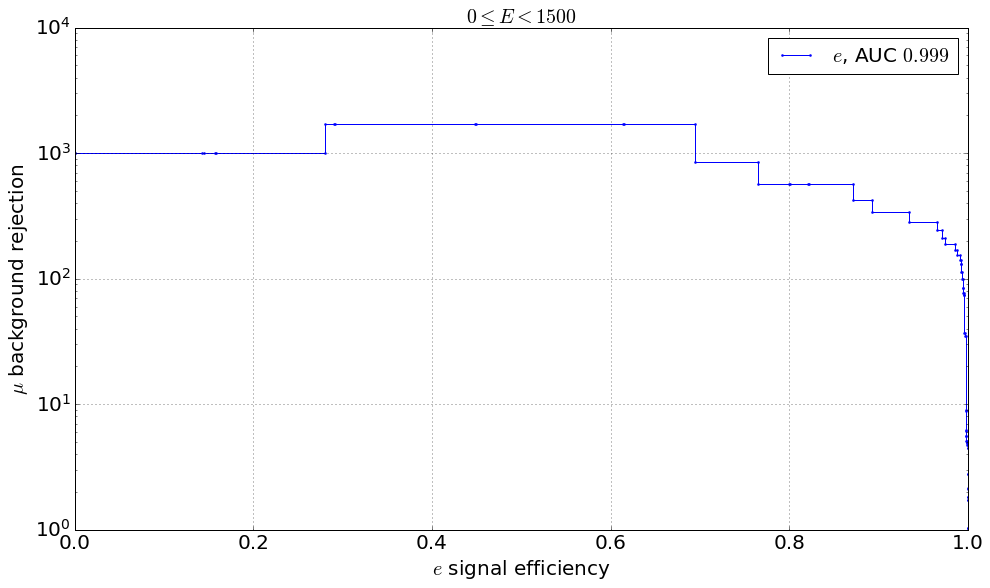

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.88235294e-04,
        5.88235294e-04, 5.88235294e-04, 5.88235294e-04, 5.88235294e-04,
        5.88235294e-04, 5.88235294e-04, 5.88235294e-04, 1.17647059e-03,
        1.17647059e-03, 1.76470588e-03, 1.76470588e-03, 1.76470588e-03,
        1.76470588e-03, 1.76470588e-03, 1.76470588e-03, 2.35294118e-03,
        2.35294118e-03, 2.94117647e-03, 2.94117647e-03, 3.52941176e-03,
        3.52941176e-03, 4.11764706e-03, 4.11764706e-03, 4.70588235e-03,
        4.70588235e-03, 5.29411765e-03, 5.29411765e-03, 5.88235294e-03,
        5.88235294e-03, 6.47058824e-03, 6.47058824e-03, 7.05882353e-03,
        7.05882353e-03, 7.64705882e-03, 7.64705882e-03, 8.82352941e-03,
        8.82352941e-03, 1.00000000e-02, 1.00000000e-02, 1.17647059e-02,
        1.17647059e-02, 1.29411765e-02, 1.29411765e-02, 1.35294118e-02,
        1.35294118e-02, 2.70588235e-02, 2.70588235e-02, 2.882352

In [9]:
# Plot the ROC curve for e vs mu
plot_utils.plot_ROC_curve_one_vs_one(softmaxes, labels, energies, {"e":1, "mu":2}, "e", "mu", show_plot=True)

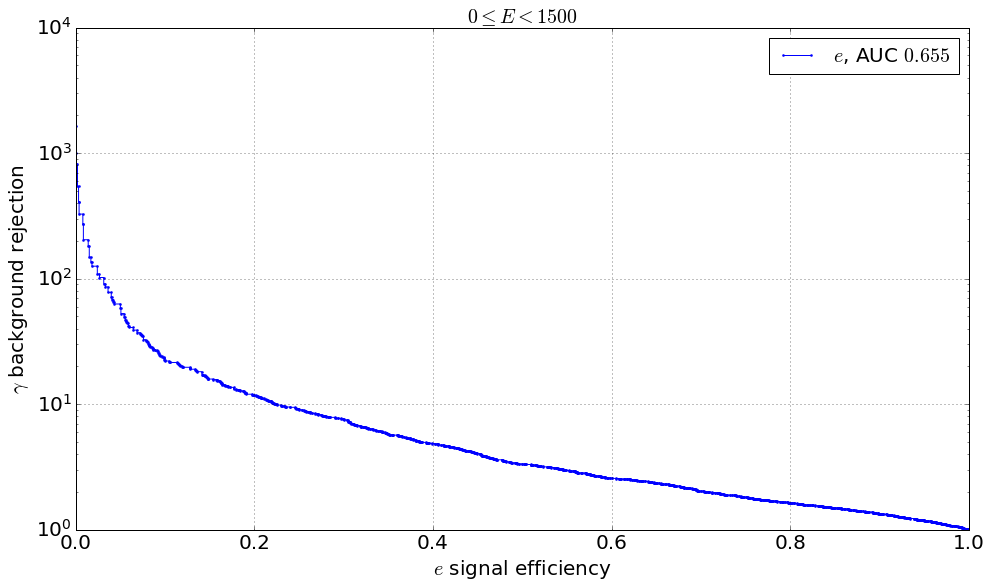

(array([0.00000000e+00, 6.11620795e-04, 1.22324159e-03, ...,
        9.93883792e-01, 9.93883792e-01, 1.00000000e+00]),
 array([0.       , 0.       , 0.       , ..., 0.9993994, 1.       ,
        1.       ]),
 array([1.9973257e+00, 9.9732566e-01, 9.9668354e-01, ..., 1.3733860e-03,
        1.3658222e-03, 3.1588803e-04], dtype=float32),
 0.6546697155871468,
 array([0.       , 0.       , 0.       , ..., 0.9981982, 1.       ,
        1.       ]),
 array([0.00000000e+00, 6.11620795e-04, 4.89296636e-03, ...,
        9.98165138e-01, 9.98165138e-01, 1.00000000e+00]),
 array([1.9996803e+00, 9.9968028e-01, 9.9869412e-01, ..., 2.6719891e-03,
        5.1262026e-04, 1.8908861e-04], dtype=float32),
 0.6574475392824015)

In [10]:
# Plot the ROC curve for e vs gamma
plot_utils.plot_ROC_curve_one_vs_one(softmaxes, labels, energies, {"e":1, "gamma":0}, "e", "gamma", show_plot=True)

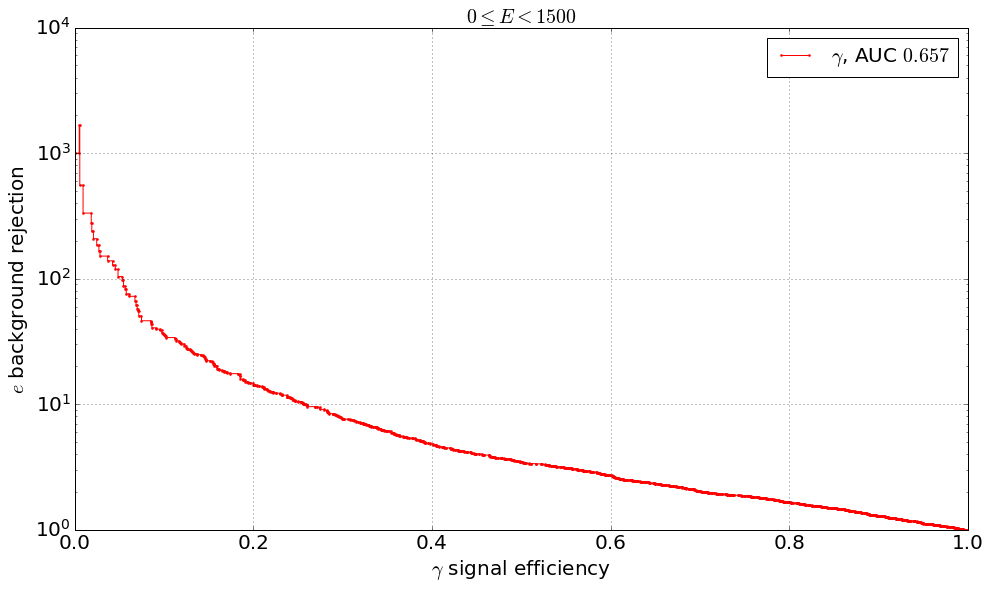

(array([0.       , 0.       , 0.       , ..., 0.9981982, 1.       ,
        1.       ]),
 array([0.00000000e+00, 6.11620795e-04, 4.89296636e-03, ...,
        9.98165138e-01, 9.98165138e-01, 1.00000000e+00]),
 array([1.9996803e+00, 9.9968028e-01, 9.9869412e-01, ..., 2.6719891e-03,
        5.1262026e-04, 1.8908861e-04], dtype=float32),
 0.6574475392824015,
 array([0.00000000e+00, 6.11620795e-04, 1.22324159e-03, ...,
        9.93883792e-01, 9.93883792e-01, 1.00000000e+00]),
 array([0.       , 0.       , 0.       , ..., 0.9993994, 1.       ,
        1.       ]),
 array([1.9973257e+00, 9.9732566e-01, 9.9668354e-01, ..., 1.3733860e-03,
        1.3658222e-03, 3.1588803e-04], dtype=float32),
 0.6546697155871468)

In [11]:
# Plot the ROC curve for e vs gamma
plot_utils.plot_ROC_curve_one_vs_one(softmaxes, labels, energies, {"e":1, "gamma":0}, "gamma", "e", show_plot=True)

## Plot the signal efficiency

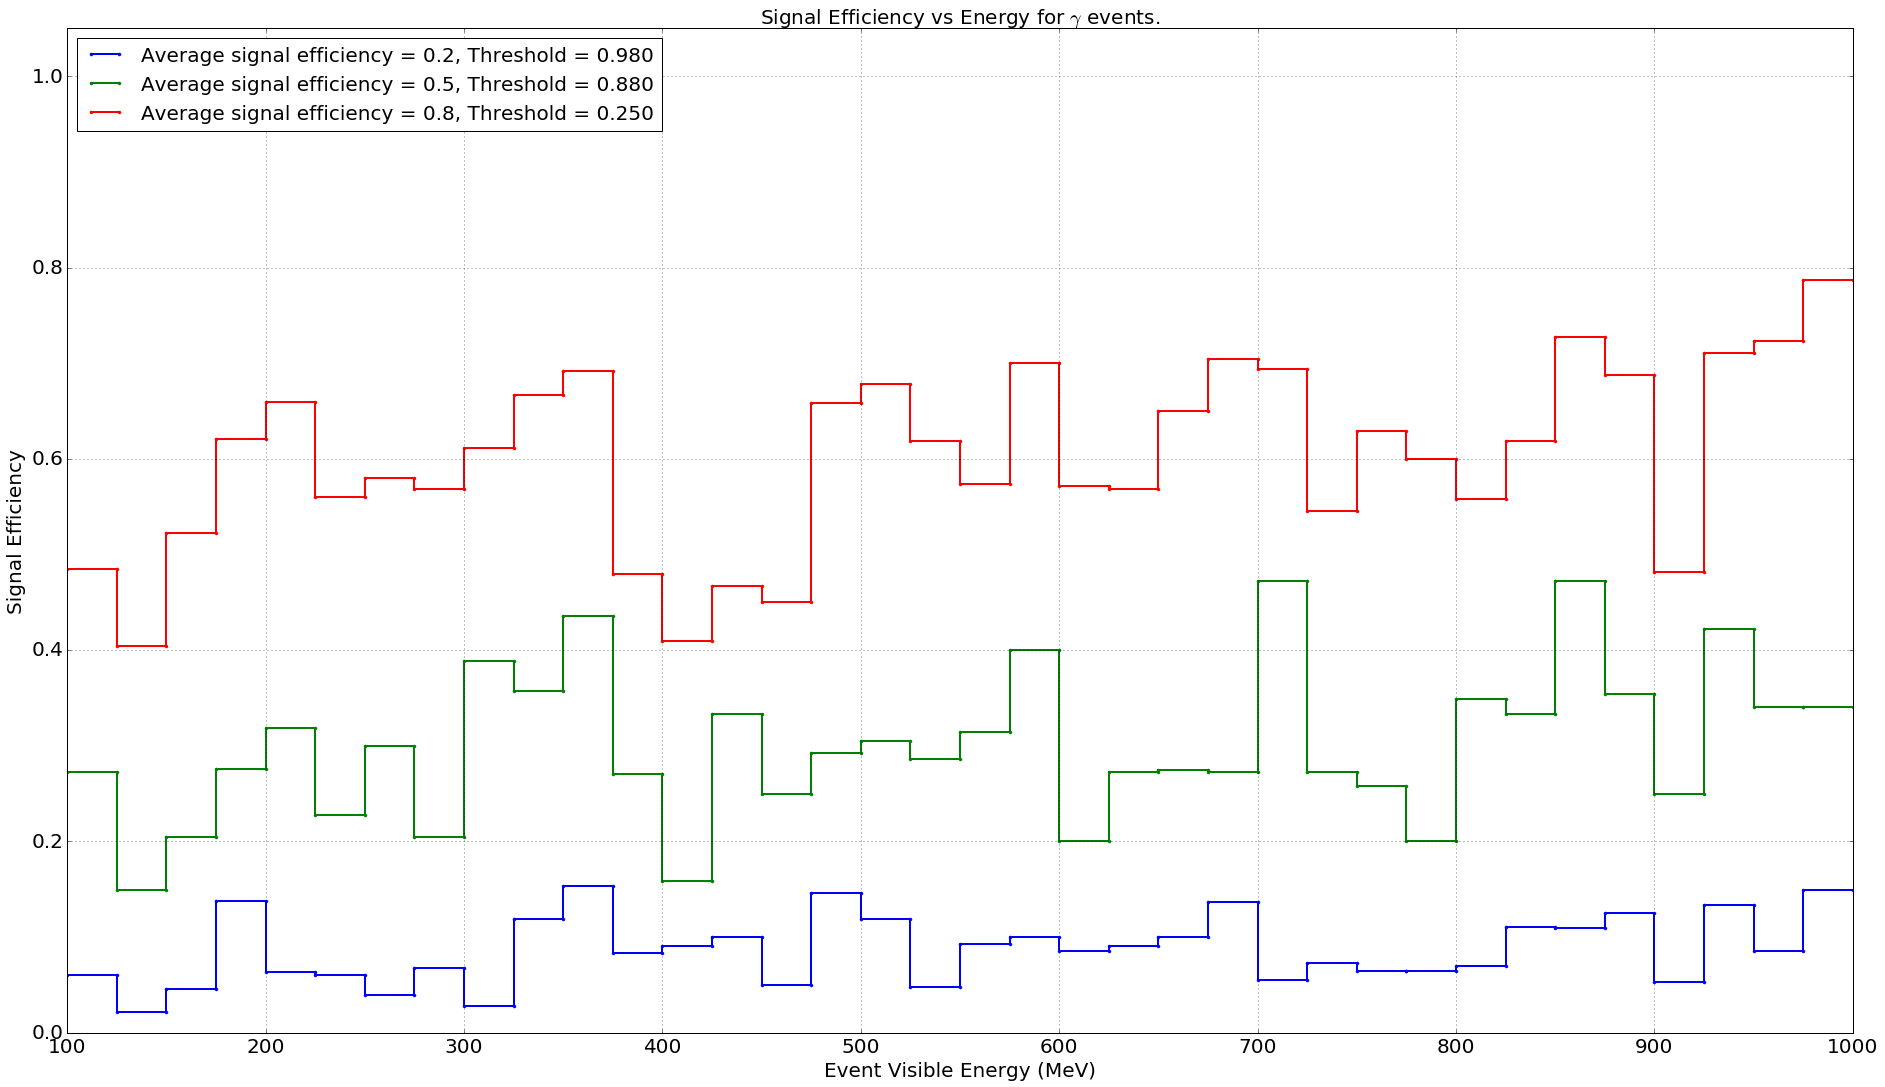

In [12]:
# Plot the signal efficiency for two events
plot_utils.plot_signal_efficiency(softmaxes, labels, energies, {"gamma":0, "e":1}, "gamma", "e",
                       avg_efficiencies=[0.2, 0.5, 0.8], show_plot=True)

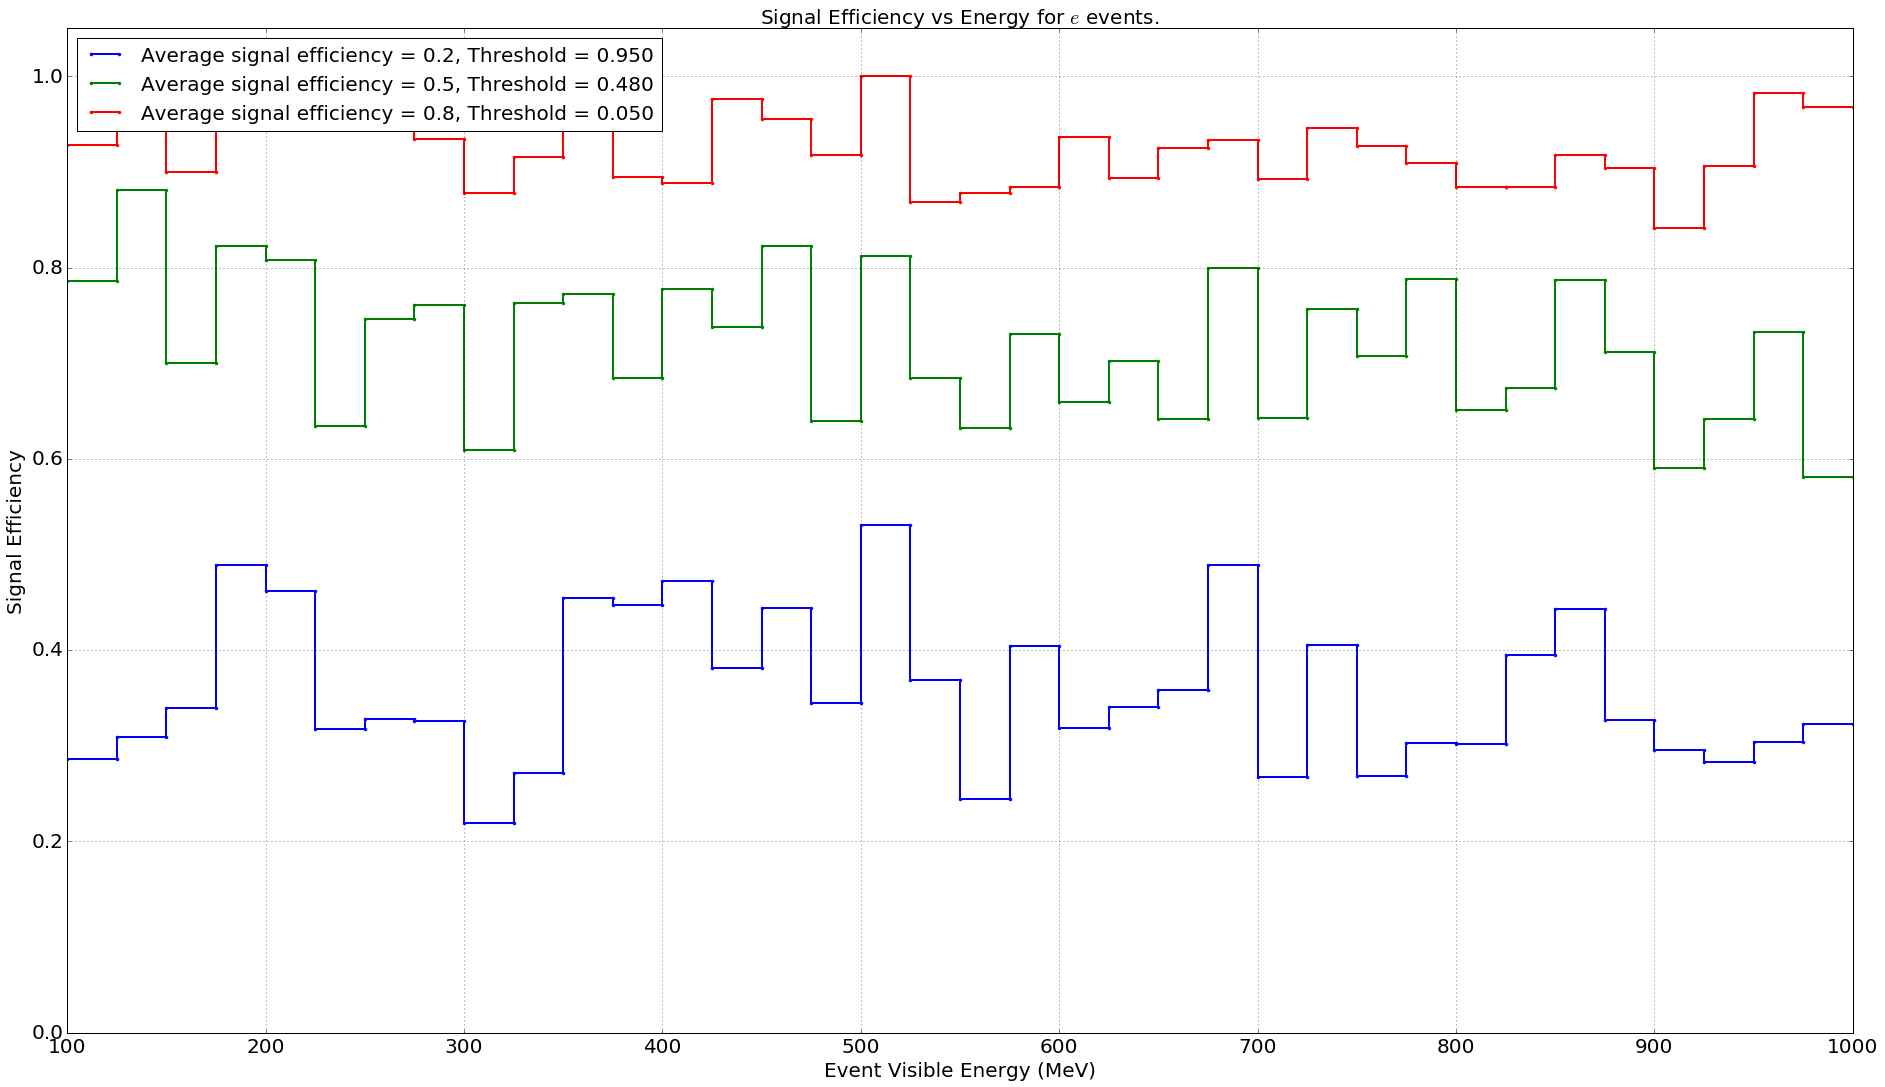

In [13]:
# Plot the signal efficiency for two events
plot_utils.plot_signal_efficiency(softmaxes, labels, energies, {"gamma":0, "e":1}, "e", "gamma",
                       avg_efficiencies=[0.2, 0.5, 0.8], show_plot=True)

## Plot the background rejection

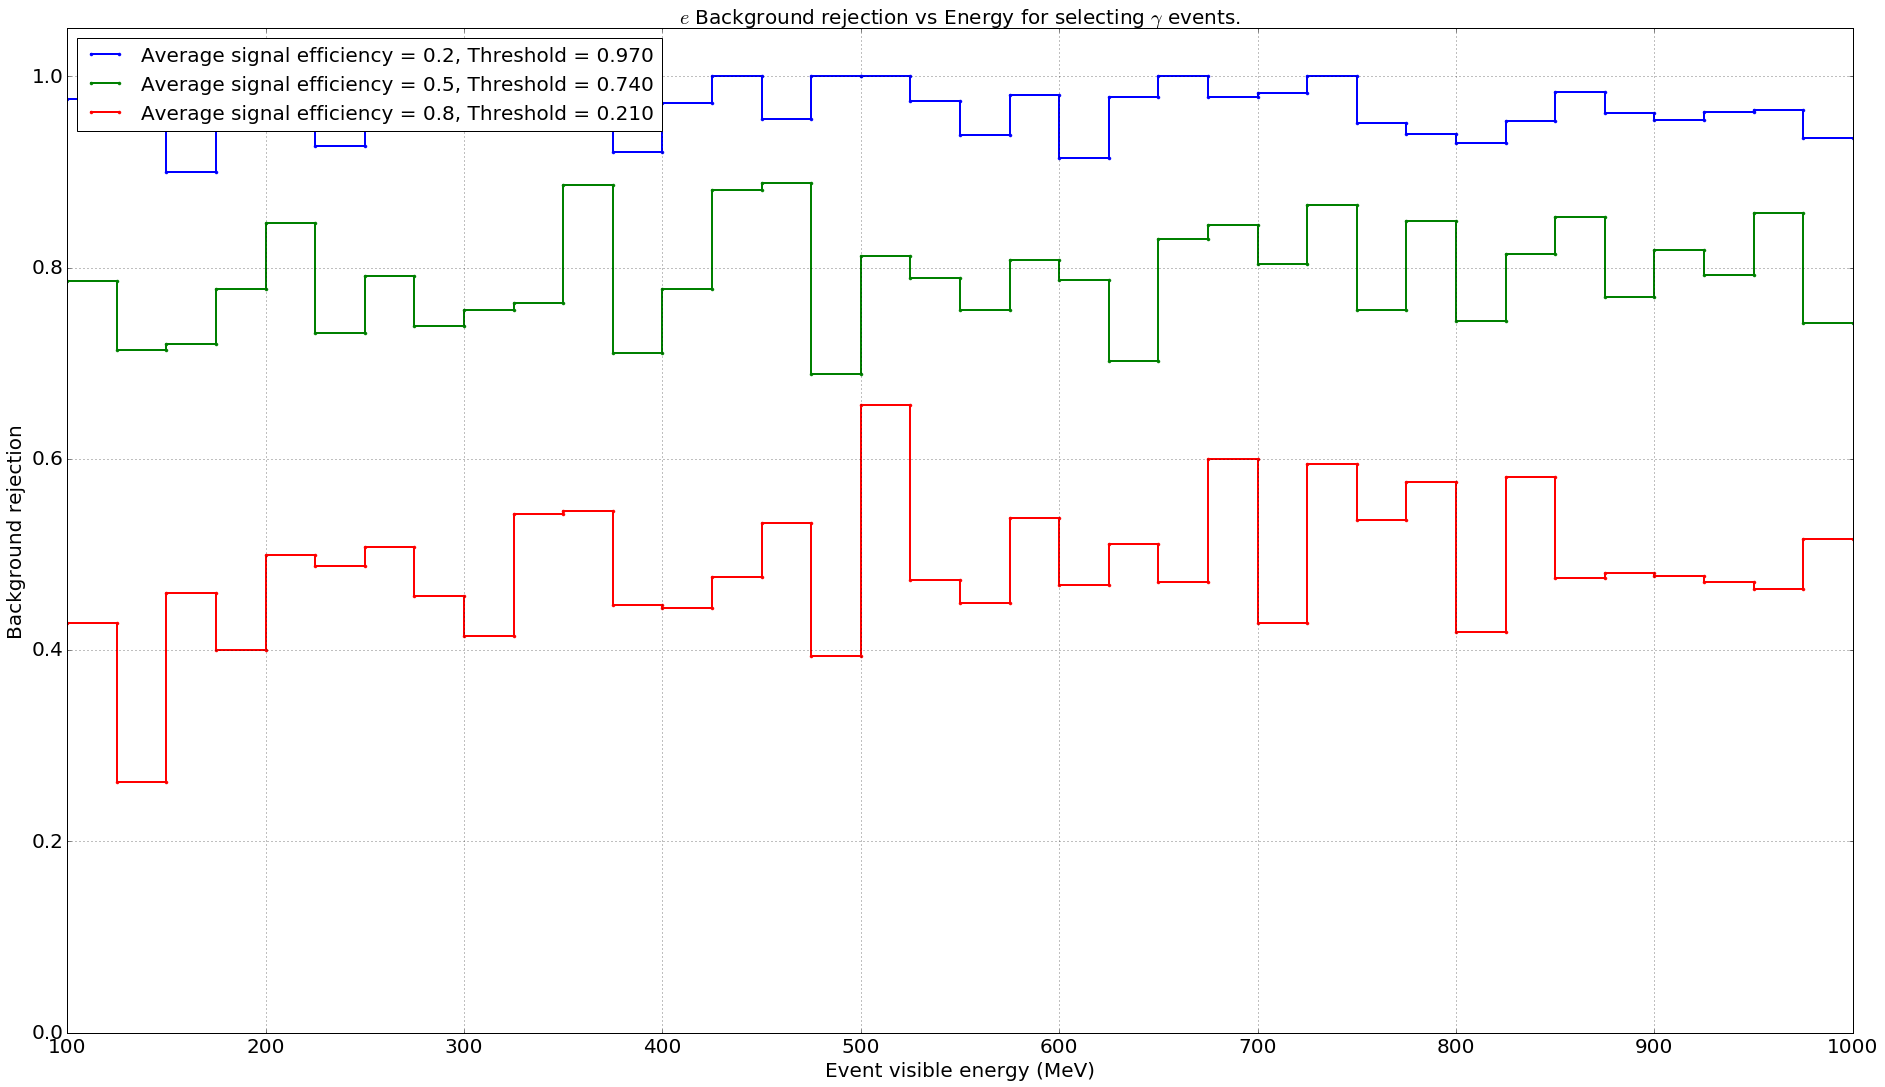

In [26]:
# Plot the background rejection
plot_utils.plot_background_rejection(softmaxes, labels, energies, {"gamma":0, "e":1}, "gamma",
                                    avg_efficiencies=[0.2, 0.5, 0.8], show_plot=True)

## Plot the training log

## 1. Plotting the performance of only a single model

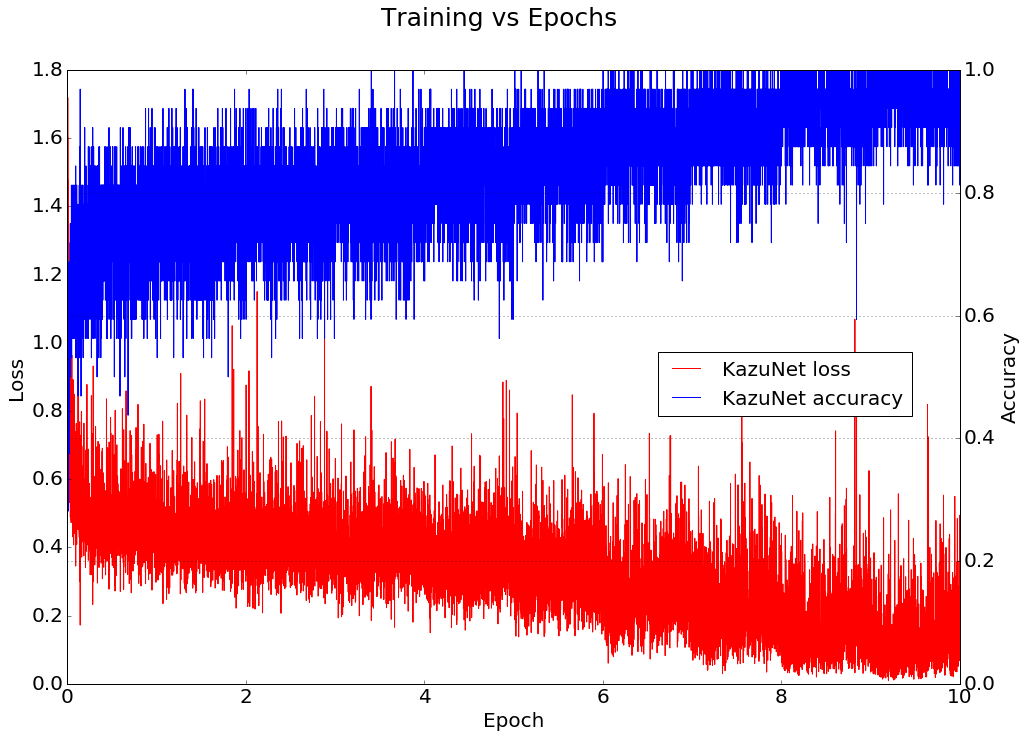

In [44]:
# Setup the path to the training log file
training_log = dump_dir + "log_train.csv"
plot_utils.plot_training([training_log], ["KazuNet"], {"KazuNet":["red", "blue"]}, show_plot=True)

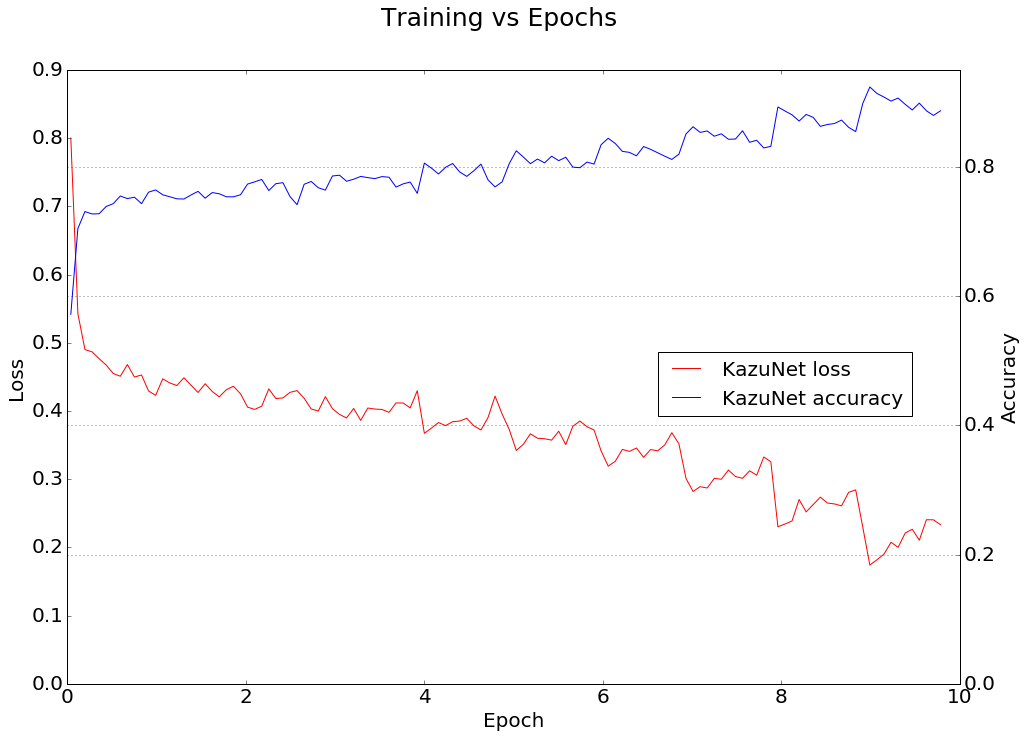

In [40]:
# Plot using the downsample intervals
plot_utils.plot_training([training_log], ["ResNet18 using Adam(lr=0.001)"], {"ResNet18 using Adam(lr=0.001)":["red", "blue"]},
                         downsample_interval=32, show_plot=True)

## 2. Plot the performance of multiple models

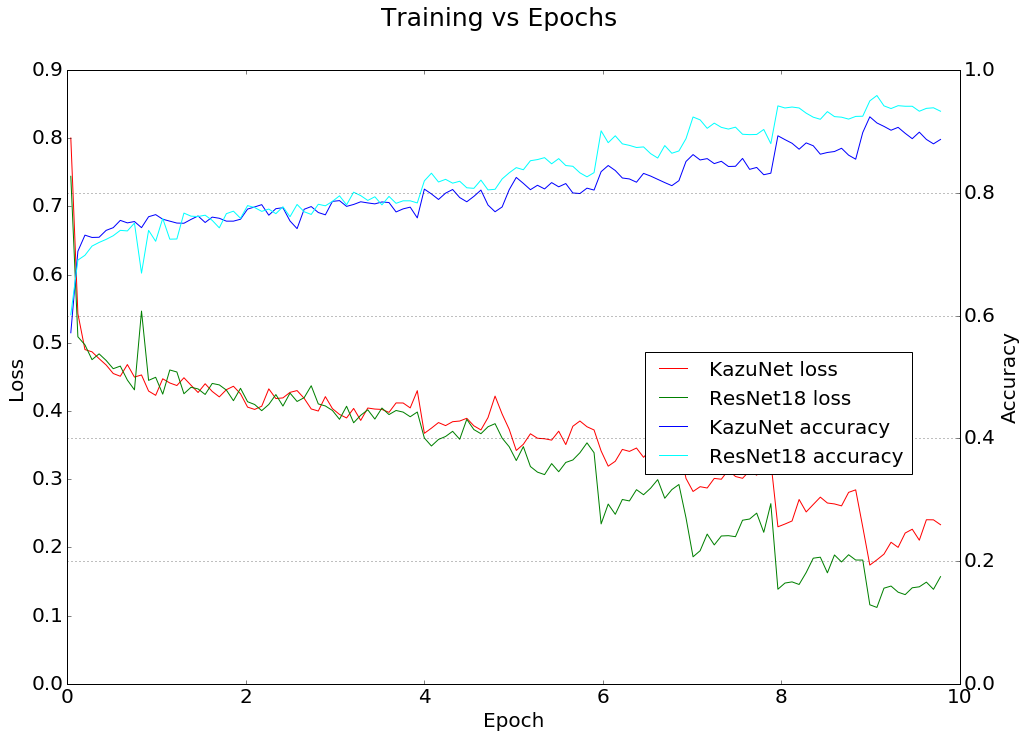

In [41]:
# Setup the path to the training log files
kazunet_log = dump_dir + "log_train.csv"

resnet_dump_dir = "/home/akajal/WatChMaL/VAE/dumps/20190614_231000/"
resnet_log = resnet_dump_dir + "log_train.csv"

plot_utils.plot_training([kazunet_log, resnet_log], ["KazuNet", "ResNet18"],
                         {"KazuNet":["red", "blue"], "ResNet18":["green", "cyan"]},
                         downsample_interval=100, show_plot=True)

## 3. Can also change the position of the legend

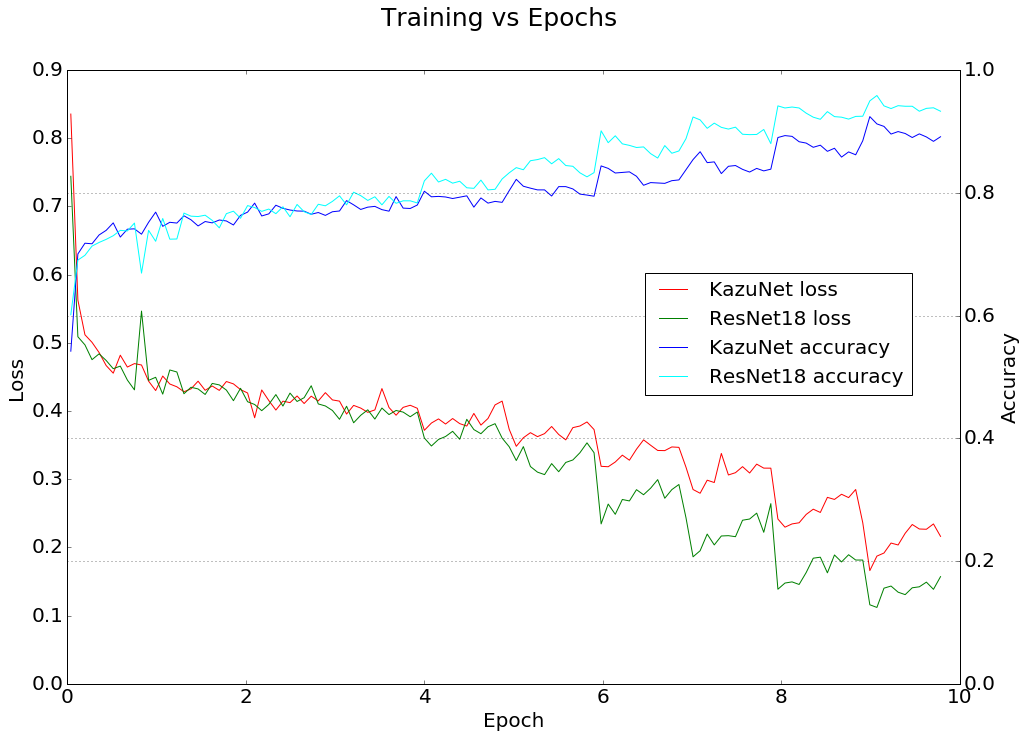

In [30]:
plot_utils.plot_training([kazunet_log, resnet_log], ["KazuNet", "ResNet18"],
                         {"KazuNet":["red", "blue"], "ResNet18":["green", "cyan"]},
                         legend_loc=(0.8, 0.6), downsample_interval=100, show_plot=True)